In [17]:
from pathlib import Path
import matplotlib.pyplot as plt
from autoeq.frequency_response import FrequencyResponse
from autoeq.constants import DEFAULT_TREBLE_SMOOTHING_WINDOW_SIZE
from autoeq.utils import smoothing_window_size
import numpy as np

In [2]:
DIR_PATH = Path().resolve()
AUTOEQ_PATH = DIR_PATH.parent.parent.joinpath('AutoEq')

In [45]:
20*np.log10(0.5)

-6.020599913279624

In [46]:
10**(-6/20)

0.5011872336272722

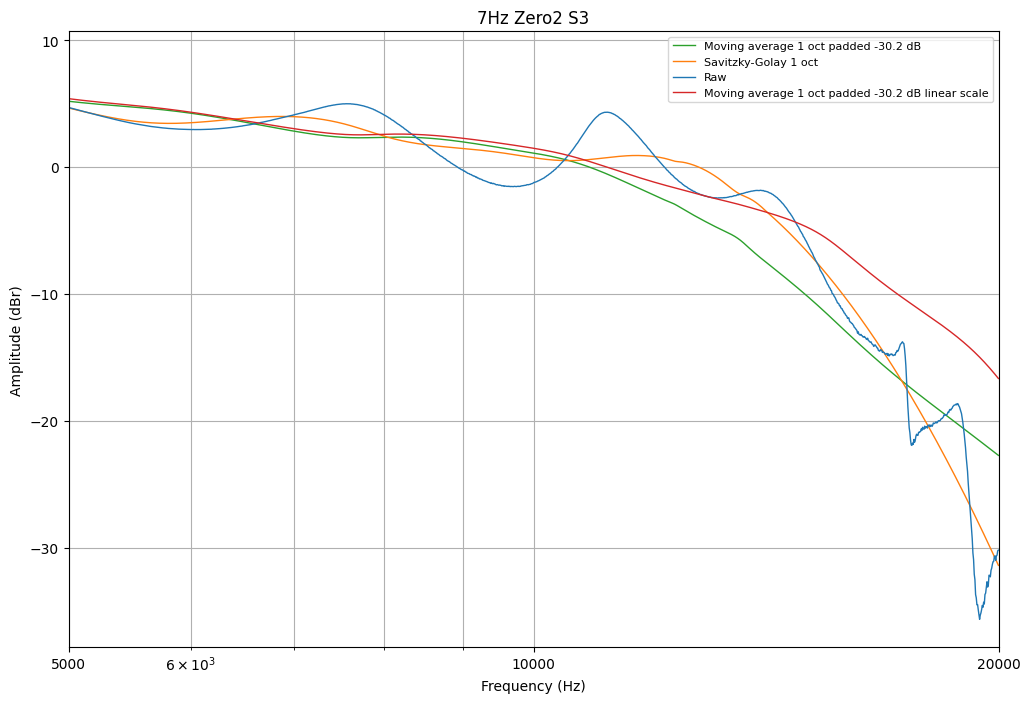

In [55]:
fr = FrequencyResponse.read_csv('7Hz Zero2 S3.txt')
fr.interpolate(f_step=1.001)
fr.center()
fr.smoothen(window_size=1, treble_window_size=1)
w = smoothing_window_size(fr.frequency, 1)
fr.target = np.convolve(np.pad(fr.raw, (w//2, w//2), 'constant', constant_values=(fr.raw[0], fr.raw[-1])), np.ones(w), 'valid') / w
fr.error = np.convolve(
    np.pad(
        10**(fr.raw/20), (w//2, w//2),
        'constant',
        constant_values=(10**(fr.raw[0]/20), 10**(fr.raw[-1]/20))
    ),
    np.ones(w),
    'valid'
) / w
fr.error = 20 * np.log10(fr.error)
fig, ax = fr.plot(
    raw_plot_kwargs={'linewidth': 1, 'color': 'C0'},
    smoothed_plot_kwargs={'linewidth': 1, 'color': 'C1', 'label': 'Savitzky-Golay 1 oct'},
    target_plot_kwargs={'linewidth': 1, 'color': 'C2', 'label': f'Moving average 1 oct padded {fr.raw[-1]:.1f} dB'},
    error_plot_kwargs={'linewidth': 1, 'color': 'C3', 'label': f'Moving average 1 oct padded {fr.raw[-1]:.1f} dB linear scale'},
    show_fig=False)
ax.set_xlim([5000, 20000])
plt.show()